# Gramener Case Study

In [1]:
# importing all the useful packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

In [2]:
# Suppress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the dataset
loan=pd.read_csv('loan.csv')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#checking the info of data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# checking the shape to understand the number of rows and columns
loan.shape

(39717, 111)

In [6]:
# checking the nulls in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# checking the nulls in each column
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
# dropping all the columns which are empty (or Nulls)
loan=loan.dropna(axis=1,how='all')

In [9]:
# Checking the shape again to see the decrease in number of columns
loan.shape

(39717, 57)

In [10]:
# Looks at the updated dataset
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Filtered out all the 'Current' status since, it is ongoing payment by the customer and we cannot take a decision if the customer will be paying it off completely or withdrawing it in between

In [11]:
# updated the loan dataframe to inlude only the 'Fully Paid' & 'Charged Off' statuses 
loan=loan.loc[loan['loan_status']!='Current']

In [12]:
# Verifying the Loan Status column
loan['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
6         Fully Paid
7         Fully Paid
8        Charged Off
9        Charged Off
10        Fully Paid
11        Fully Paid
12       Charged Off
13        Fully Paid
14       Charged Off
15        Fully Paid
16        Fully Paid
17        Fully Paid
18        Fully Paid
19        Fully Paid
20        Fully Paid
21       Charged Off
22        Fully Paid
23        Fully Paid
24       Charged Off
25        Fully Paid
26       Charged Off
27       Charged Off
28        Fully Paid
29        Fully Paid
30        Fully Paid
            ...     
39687     Fully Paid
39688    Charged Off
39689     Fully Paid
39690     Fully Paid
39691     Fully Paid
39692     Fully Paid
39693     Fully Paid
39694     Fully Paid
39695     Fully Paid
39696     Fully Paid
39697     Fully Paid
39698     Fully Paid
39699     Fully Paid
39700     Fully Paid
39701     Fully Paid
39702     Fully Paid
39703     Ful

In [13]:
# dropped the columns which are not useful in the analysis
loan=loan.drop({'url','title','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','member_id','desc','next_pymnt_d'},axis=1)

In [14]:
# Checking the shape again to see the decrease in number of columns
loan.shape

(38577, 49)

### After looking at the loan grade system, it was found that loan grade determines the interest rate. And hence, we already have nicely categorized loan rate of interest based on loan grades. Therefore we may get rid of the int_rate column as well

In [15]:
# dropped the interest rate column
loan=loan.drop(['int_rate','revol_util'],axis=1)

In [16]:
# Looks at the updated dataset
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00000,36 months,162.87,B,B2,NaN,10+ years,...,0.00,0.0000,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,2500,2500,2500.00000,60 months,59.83,C,C4,Ryder,< 1 year,...,117.08,1.1100,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,2400,2400,2400.00000,36 months,84.33,C,C5,NaN,10+ years,...,0.00,0.0000,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,10000,10000,10000.00000,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.0000,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
5,1075269,5000,5000,5000.00000,36 months,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.0000,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,7000,7000,7000.00000,60 months,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.0000,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
7,1072053,3000,3000,3000.00000,36 months,109.43,E,E1,MKC Accounting,9 years,...,0.00,0.0000,Jan-15,111.34,Dec-14,1,INDIVIDUAL,0,0,0.0
8,1071795,5600,5600,5600.00000,60 months,152.39,F,F2,NaN,4 years,...,189.06,2.0900,Apr-12,152.39,Aug-12,1,INDIVIDUAL,0,0,0.0
9,1071570,5375,5375,5350.00000,60 months,121.45,B,B5,Starbucks,< 1 year,...,269.29,2.5200,Nov-12,121.45,Mar-13,1,INDIVIDUAL,0,0,0.0
10,1070078,6500,6500,6500.00000,60 months,153.45,C,C3,Southwest Rural metro,5 years,...,0.00,0.0000,Jun-13,1655.54,Dec-15,1,INDIVIDUAL,0,0,0.0


In [17]:
# changed the employee title to Uppercase
loan['emp_title']=loan['emp_title'].str.upper()

In [18]:
# manually looking at the titles, it was found that we've entries which were identical but since they had some charaters 
# it was treated as unique and hence we changed them (note, we haven't covered all the cases here since it was manual inspection)
loan=loan.replace({'emp_title':{' INC.':'',' INC':'','AND':'&',' FCU ':'',' PARTNERSHIP':'','\\.':'','\\,':'','\\:':'','\\-':'','\\)':'','\\(':''}},regex=True)

In [19]:
# created a new dataframe 'charged_off' which contains only the loan defaulters data 
charged_off=loan[loan['loan_status']=='Charged Off']

In [20]:
# created a new dataframe 'fully_paid' which contains only the fully loan paid data 
fully_paid=loan[loan['loan_status']=='Fully Paid']

In [21]:
# defined the scale for all the seaborn plots
sns.set(font_scale=1.5)

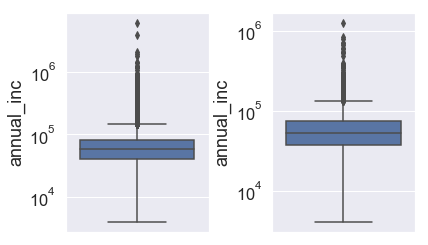

In [22]:
# created Box plot to see the spread of data
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

plt.subplot(1,2,1)
sns.boxplot(y='annual_inc',data=loan)
plt.yscale('log')


plt.subplot(1,2,2)
sns.boxplot(y='annual_inc',data=charged_off)
plt.yscale('log')

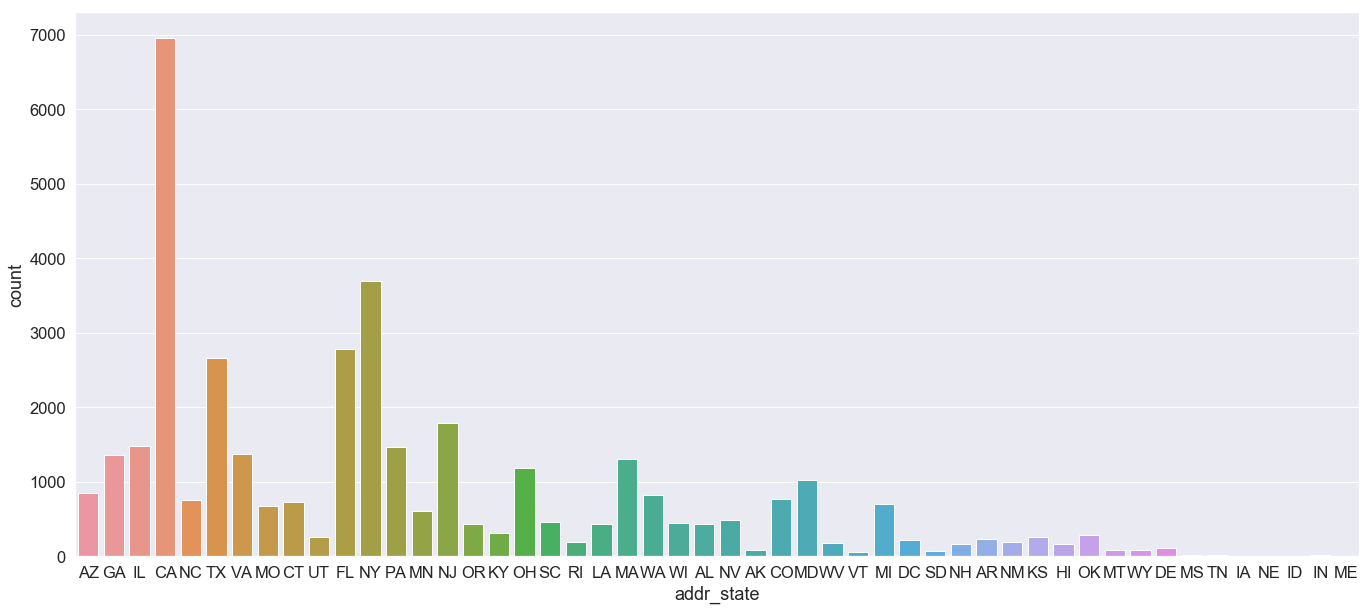

In [23]:
# checked the frequency of occurence on State for loan
plt.figure(figsize=(23,10))
sns.countplot(x="addr_state", data=loan)

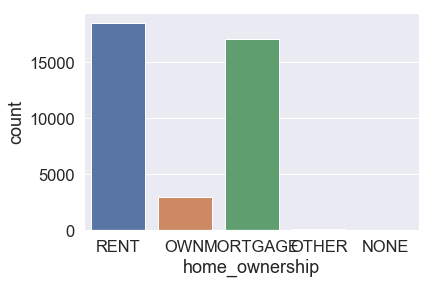

In [24]:
# checked the frequency of occurence on Home Ownership for loan
sns.countplot(x="home_ownership", data=loan)

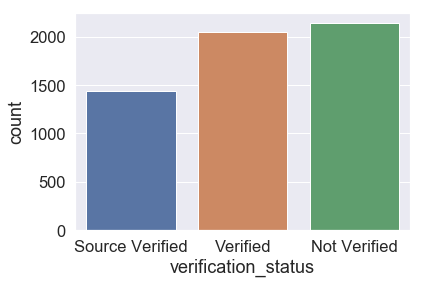

In [25]:
# checked the frequency of occurence on Verification Status for charged off
sns.countplot(x="verification_status", data=charged_off)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

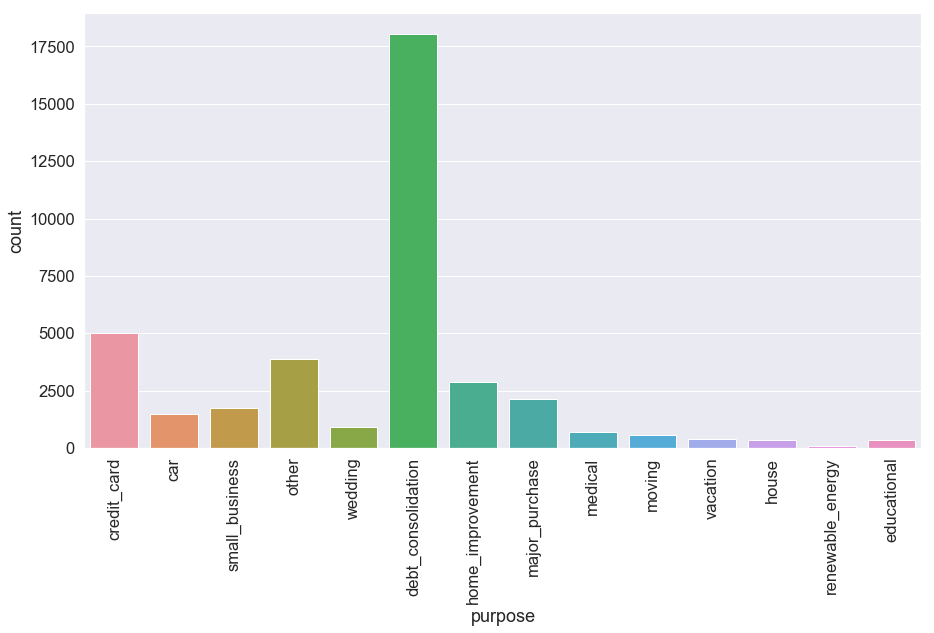

In [26]:
# checked the frequency of occurence on loan purpose for loan
plt.figure(figsize=(15,8))
sns.countplot(x="purpose", data=loan)
plt.xticks(rotation=90)

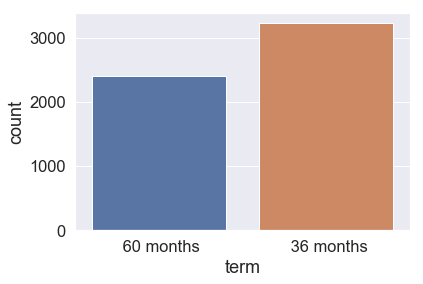

In [27]:
# checked the frequency of occurence on term of loan for charged off
sns.countplot(x="term", data=charged_off)

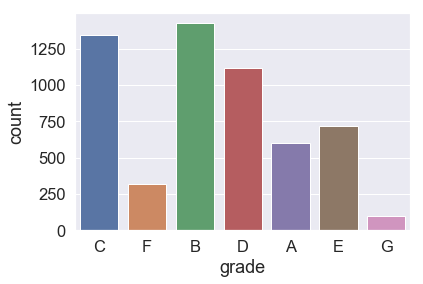

In [28]:
# checked the frequency of occurence on grade for loan
sns.countplot(x="grade" ,data=charged_off)

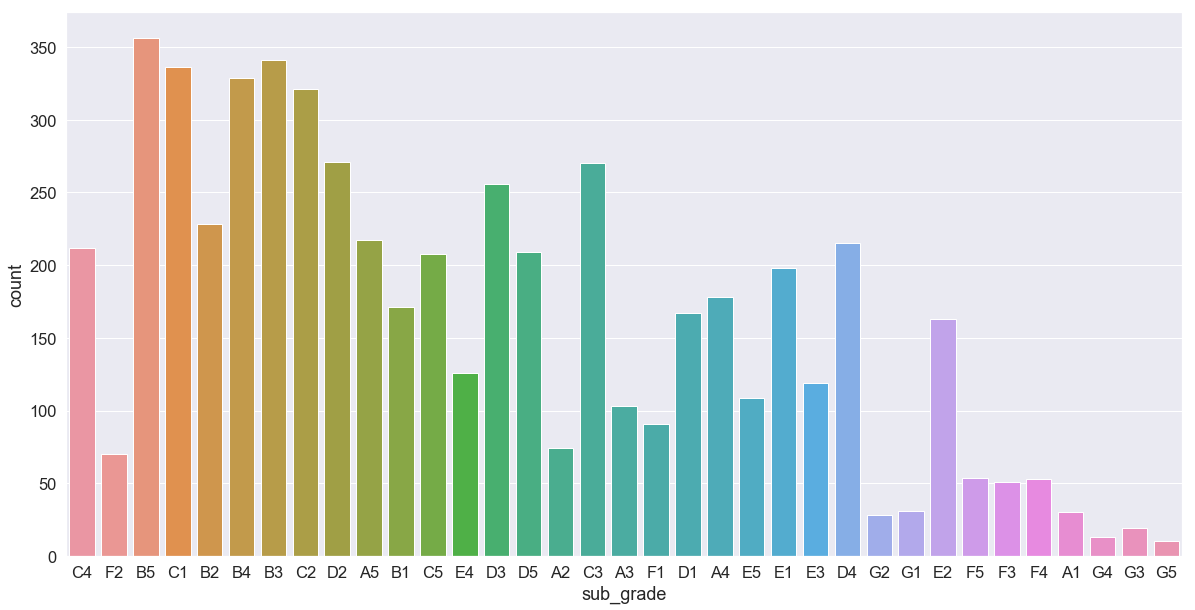

In [29]:
# checked the frequency of occurence on subgrade for loan
plt.figure(figsize=(20,10))
sns.countplot(x="sub_grade", data=charged_off)

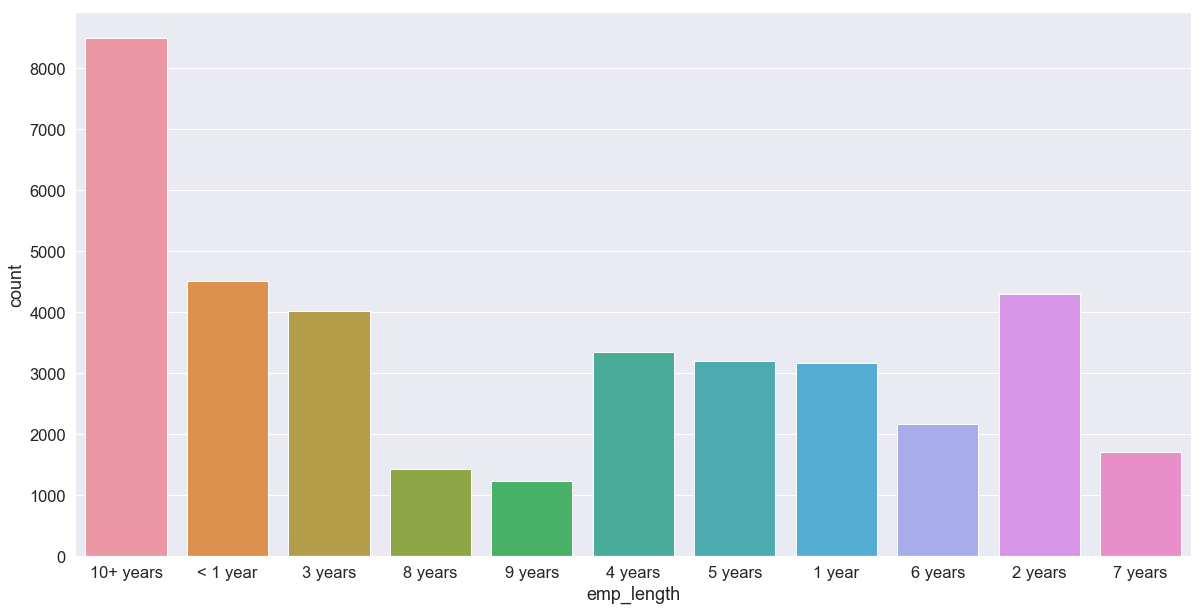

In [30]:
# checked the frequency of occurence on length of employee on job for loan
plt.figure(figsize=(20,10))
sns.countplot(x="emp_length", data=loan)

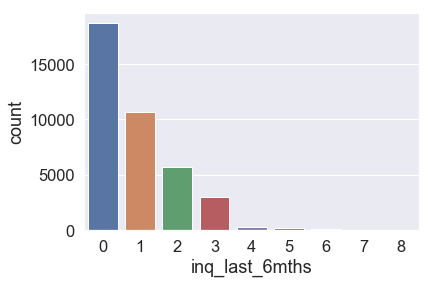

In [31]:
# checked the frequency of occurence on inqiry in last 6 months for loan
sns.countplot(x="inq_last_6mths", data=loan)

In [32]:
# created a function for splitting the date column since it was going to be used numerously
def year(df,col,col2):
    df[col2]=df[col].str.split('-').str[1].astype(int)
    df[col2]=df[col2].apply(lambda x:2000+x if x<46 else 1900+x)

In [33]:
# splitted the year in two columns to extract the month and Year for the analysis
year(loan,'earliest_cr_line','earliest_cr_line_year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

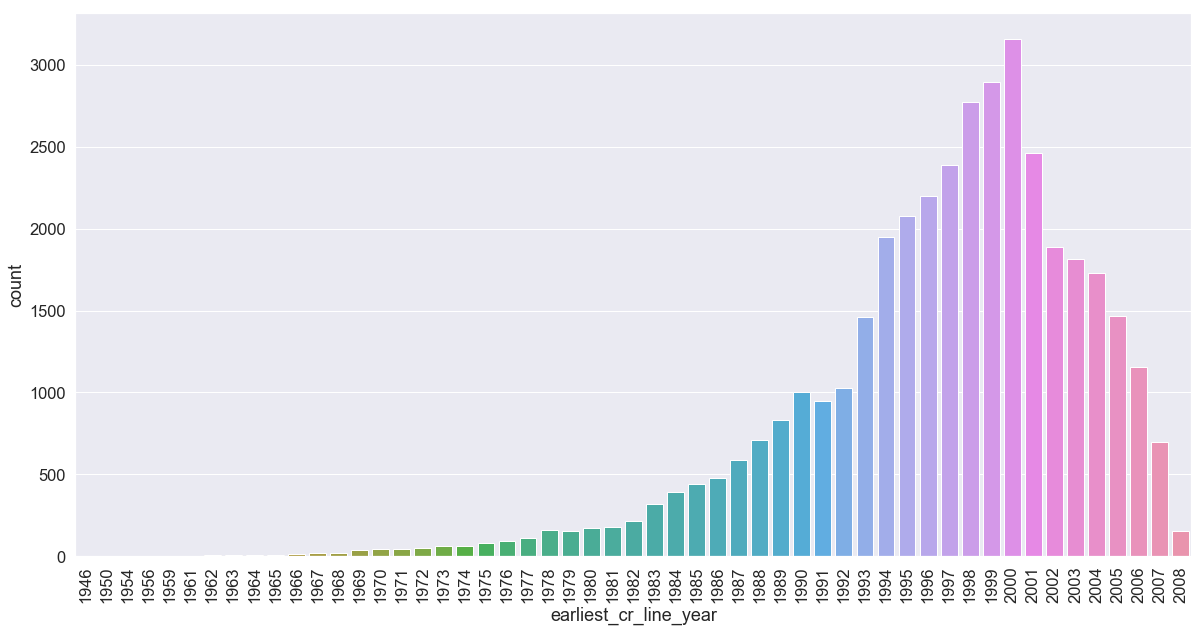

In [34]:
# checked the frequency of occurence on year for loan
plt.figure(figsize=(20,10))
sns.countplot(x="earliest_cr_line_year", data=loan)
plt.xticks(rotation=90)

In [35]:
# created a function for splitting the date column and creating the count plots since it was going to be used numerously
def year1(df,col,col2):
    df[col2]=df[col].str.split('-').str[1].astype(int)
    df[col2]=df[col2].apply(lambda x:2000+x)
    
    plt.figure(figsize=(20,10))
    sns.countplot(x=col2, data=df)

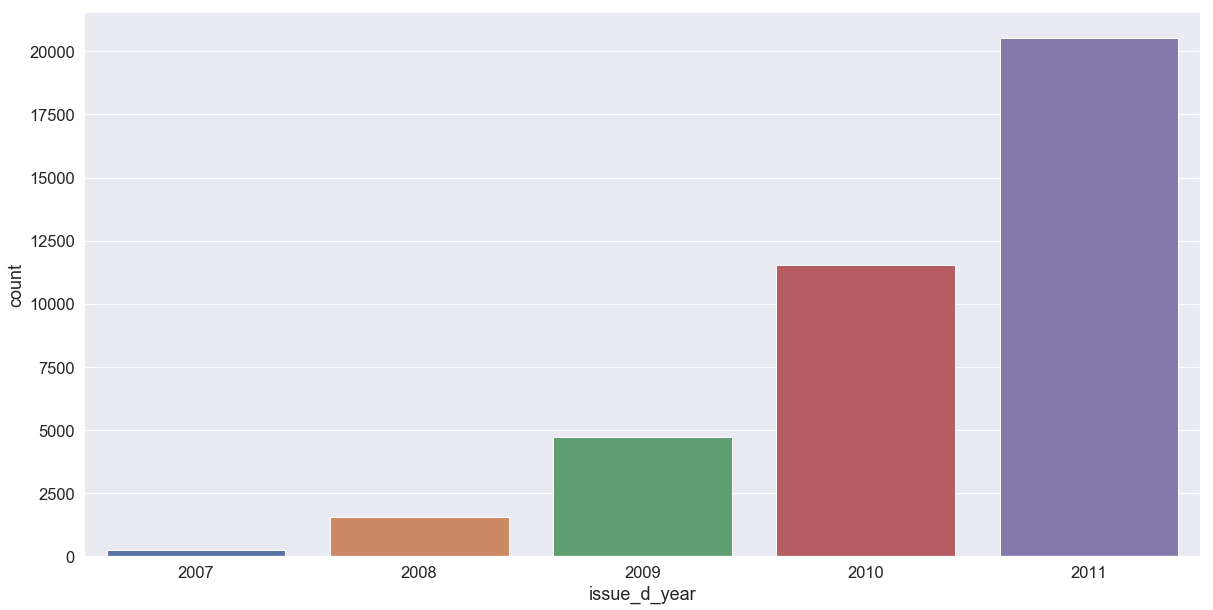

In [36]:
# checked the frequency of occurence on loan issued for loan
year1(loan,'issue_d','issue_d_year')

In [37]:
# checking the nulls again in each column
loan.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
mths_since_last_record     35837
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
initial_list_status            0
out_prncp 

In [38]:
# removed the null rows from the last_credit_pull_d column
loan=loan.dropna(subset=['last_credit_pull_d']) 

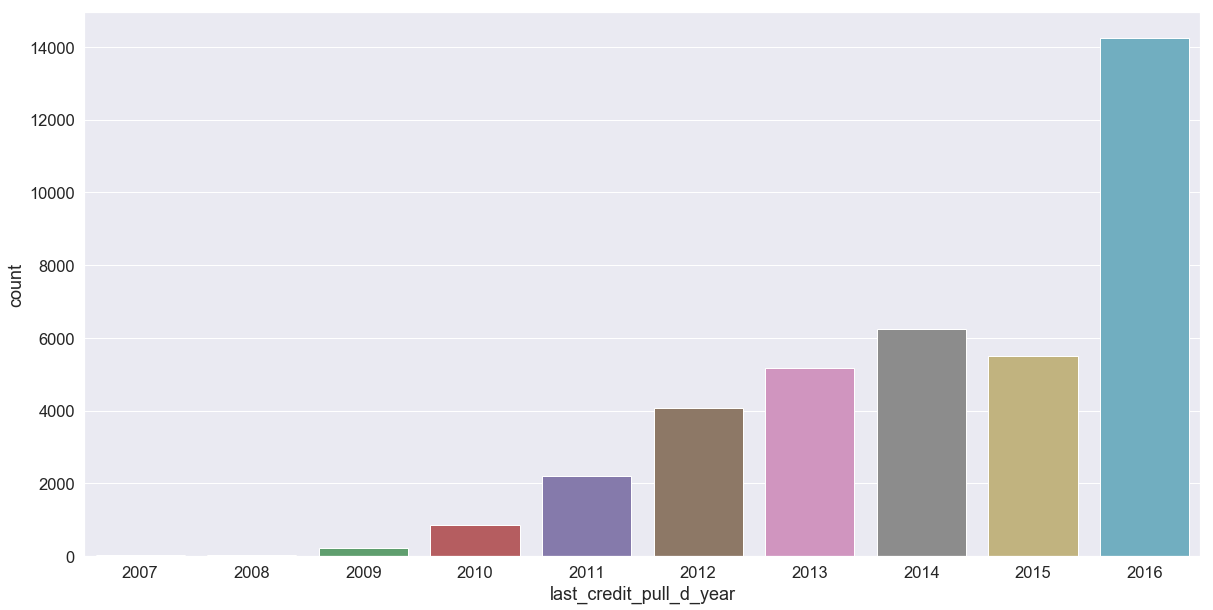

In [39]:
# checked the frequency of occurence on last_credit_pull_d for loan
year1(loan,'last_credit_pull_d','last_credit_pull_d_year')

In [40]:
# removed the null rows from the last_pymnt_d column
loan=loan.dropna(subset=['last_pymnt_d']) 

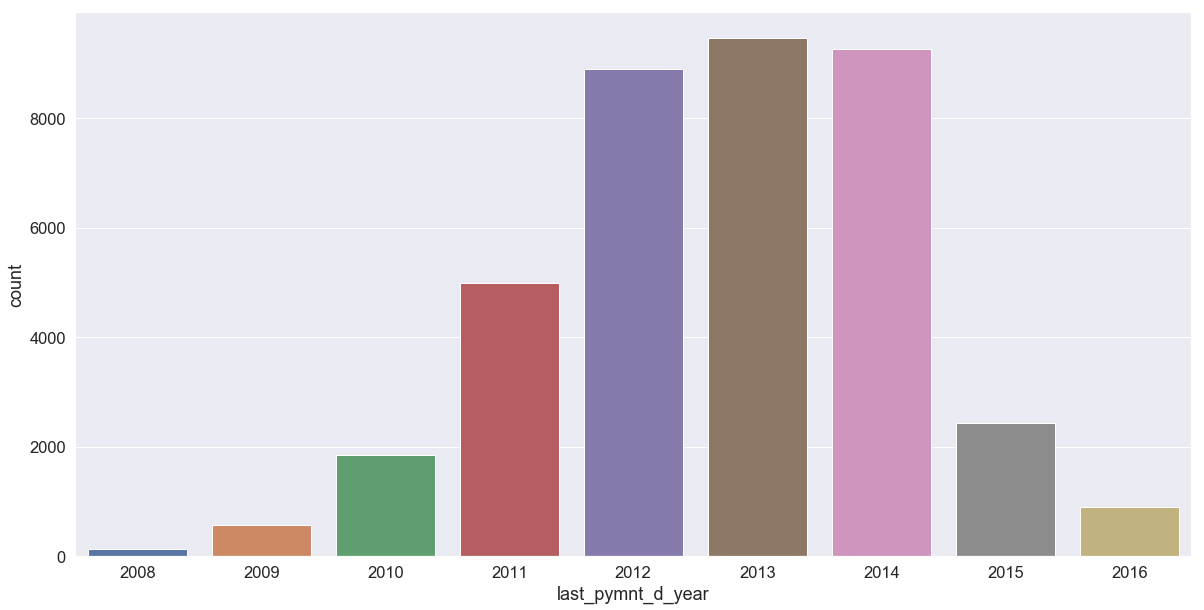

In [41]:
# checked the frequency of occurence on last_pymnt_d for loan
year1(loan,'last_pymnt_d','last_pymnt_d_year')

In [42]:
# BOX PLOT of 2 Columns
def box2(df,col,col2):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.tight_layout()

    plt.subplot(1,2,1)
    sns.boxplot(y=col,data=df)
    plt.yscale('log')
    fig.tight_layout()


    plt.subplot(1,2,2)
    sns.boxplot(y=col2,data=df)
    plt.yscale('log')
    fig.tight_layout()
    
#BOXPLOT for 1 column
def box(df,col):
    sns.boxplot(y=col,data=df)
    plt.yscale('log')
    fig.tight_layout()
    plt.figure(figsize=(12,8))

In [43]:
# COUNTPLOT for 1 column
def count(df,col):
    plt.figure(figsize=(20,10))
    sns.countplot(x=col, data=df)
    
# COUNTPLOTS for 2 columns
def count2(df,col,col2):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.tight_layout()

    plt.subplot(1,2,1)
    sns.countplot(x=col, data=loan)
    fig.tight_layout()


    plt.subplot(1,2,2)
    sns.countplot(x=col2, data=loan)
    fig.tight_layout()

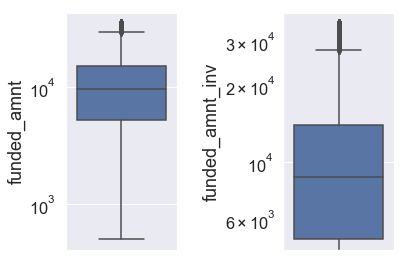

In [44]:
# BOXPLOT for Funded Amount & Funded Amount invested 
box2(loan,"funded_amnt","funded_amnt_inv")

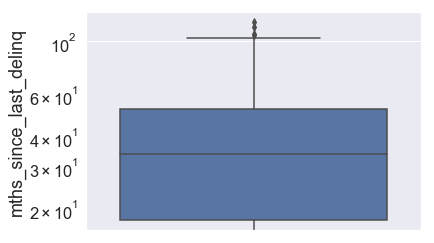

<Figure size 864x576 with 0 Axes>

In [45]:
# BOX PLOT for Months since last delinquen
box(loan,"mths_since_last_delinq")

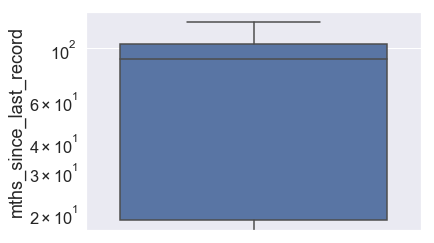

<Figure size 864x576 with 0 Axes>

In [46]:
# created Box plot to see the spread of data
box(loan,'mths_since_last_record')

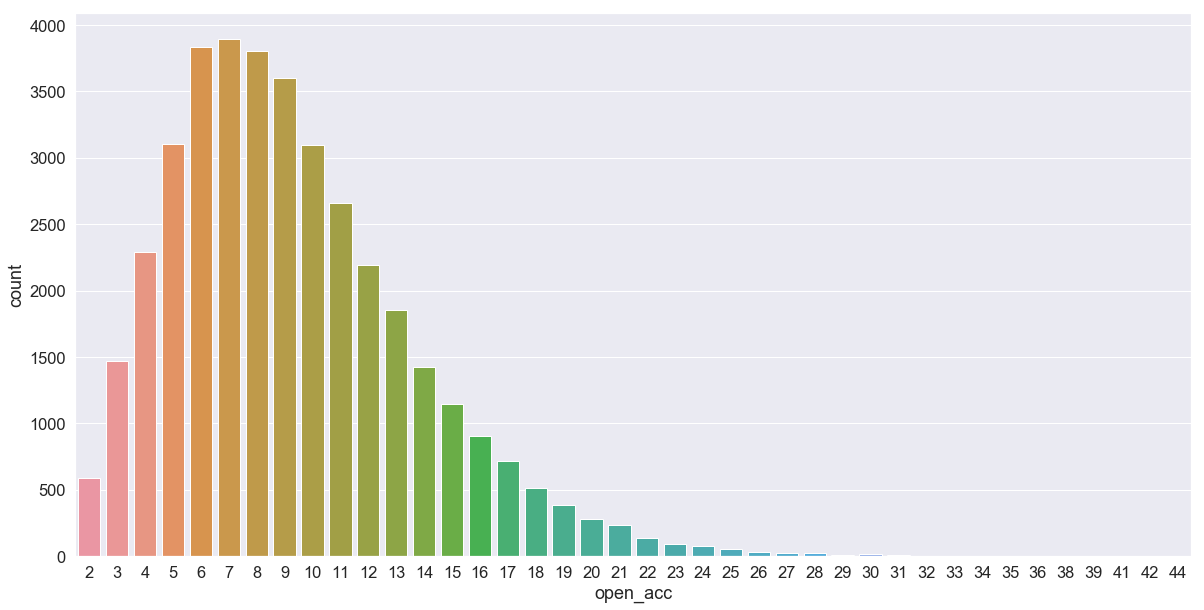

In [47]:
# checked the frequency of occurence on opened accounts for loan
count(loan,"open_acc")

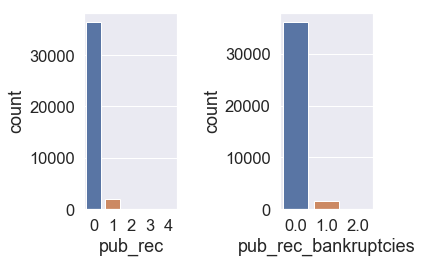

In [48]:
# COUNTPLOT for pub_rec,pub_rec_bankruptcies columns
count2(loan,"pub_rec","pub_rec_bankruptcies")

In [49]:
# removed the column since it is not useful due to large amount of 0 values
loan=loan.drop(['pub_rec','pub_rec_bankruptcies'],axis=1) 

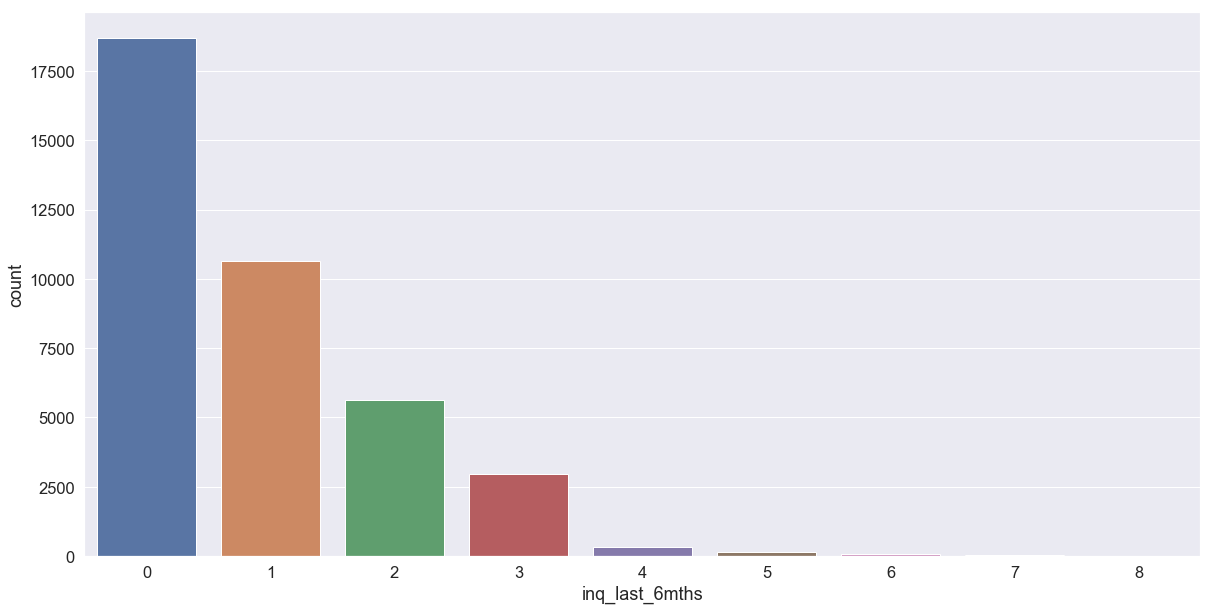

In [50]:
# checked the frequency of occurence on inquiry in last 6 months for loan
count(loan,'inq_last_6mths')

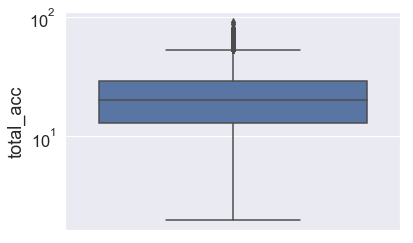

<Figure size 864x576 with 0 Axes>

In [51]:
# created Box plot to see the spread of data
box(loan,'total_acc')

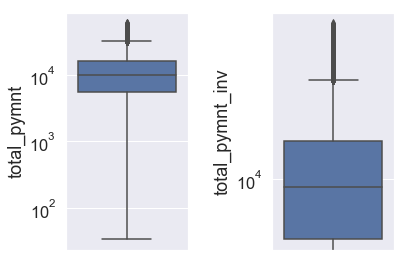

In [52]:
# created Box plot to see the spread of data
box2(loan,'total_pymnt','total_pymnt_inv')

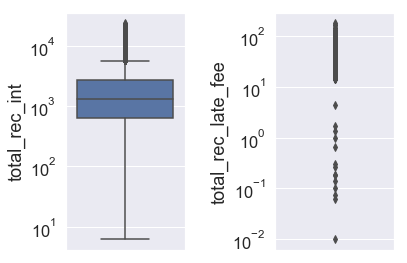

In [53]:
# created Box plot to see the spread of data
box2(loan,"total_rec_int","total_rec_late_fee")

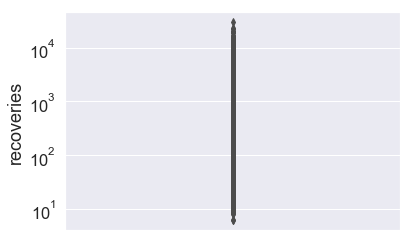

<Figure size 864x576 with 0 Axes>

In [54]:
# created Box plot to see the spread of data
box(loan,"recoveries")

In [55]:
# grouped the recoveries in the cluster form
loan['recoveries_bin']=pd.cut(loan['recoveries'],[0,3999,7999,11999,15999,19999,23999,30000],1,labels=['0-4k','4k-8k','8k-12k','12k-16k','16k-20k','20k-24k','24k+'],include_lowest=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

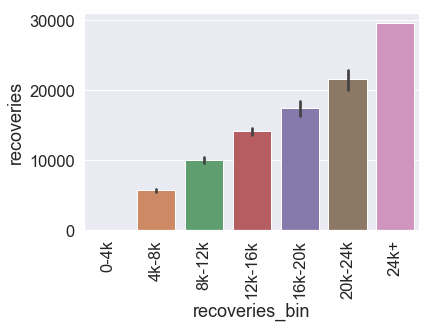

In [56]:
# checked the frequency of occurence on recoveries for loan
sns.barplot(x='recoveries_bin',y='recoveries',data=loan)
plt.xticks(rotation=90)

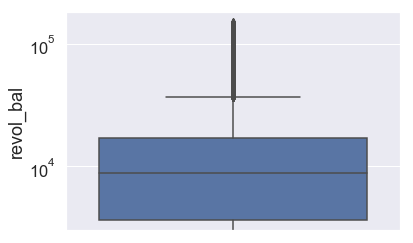

<Figure size 864x576 with 0 Axes>

In [57]:
# Boxplot for revol_bal
box(loan,"revol_bal")

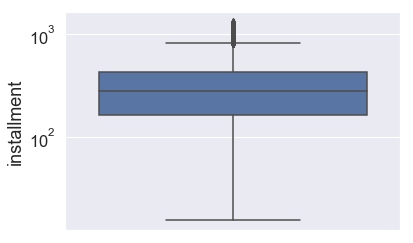

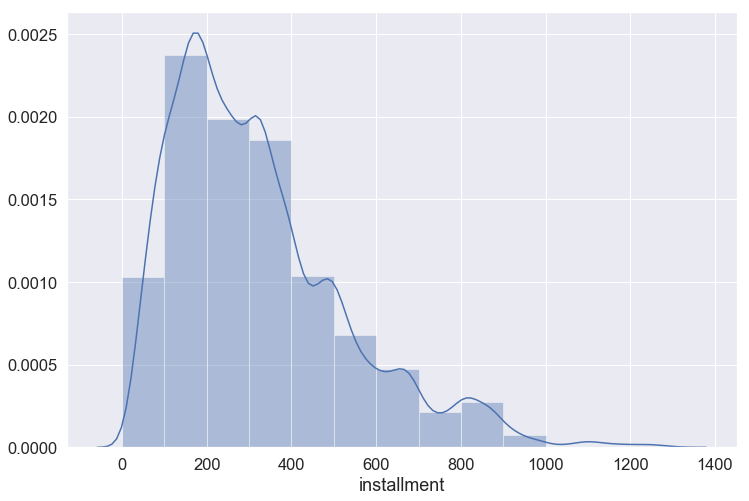

In [58]:
# BOXPLOT for installment
box(loan,"installment")

# histogram
sns.distplot(loan.installment,bins=[0,100,200,300,400,500,600,700,800,900,1000])

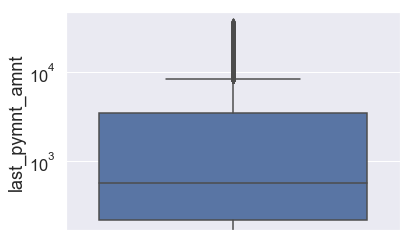

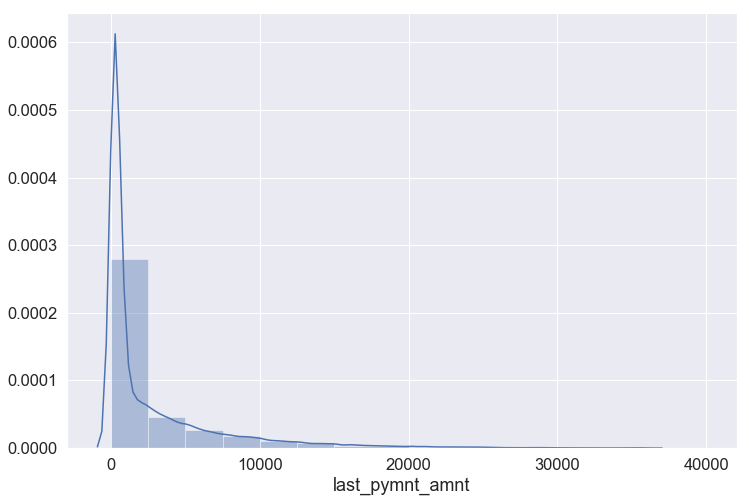

In [59]:
# created Box plot to see the spread of data
box(loan,"last_pymnt_amnt")

# created histogram to visualize the frequency in the bins
sns.distplot(loan.last_pymnt_amnt,bins=[0,2500,5000,7500,10000,12500,15000,20000,25000,30000,35000,40000])

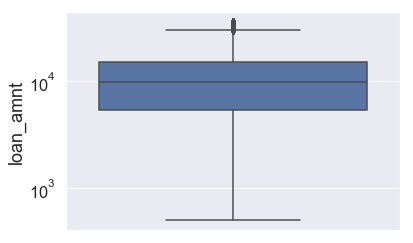

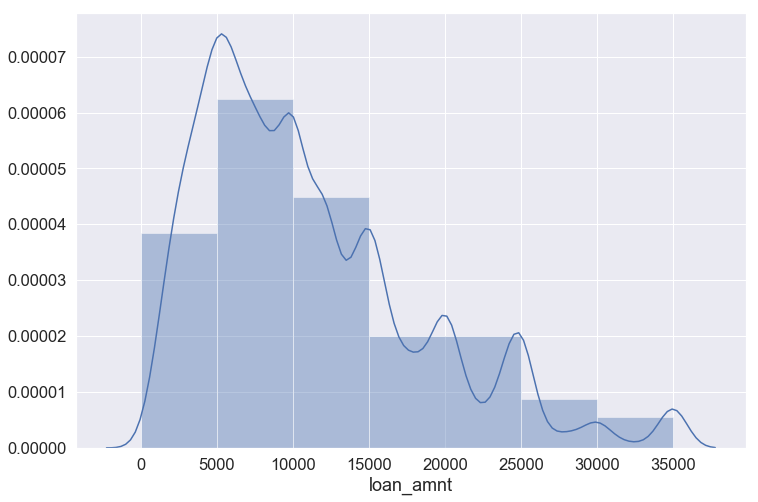

In [60]:
# created Box plot to see the spread of data
box(loan,"loan_amnt")

# created histogram to visualize the frequency in the bins
sns.distplot(loan.loan_amnt,bins=[0,5000,10000,15000,25000,30000,35000])

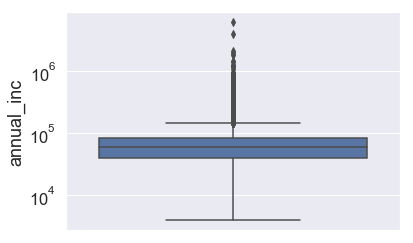

<Figure size 864x576 with 0 Axes>

In [61]:
# created Box plot to see the spread of data
box(loan,'annual_inc')

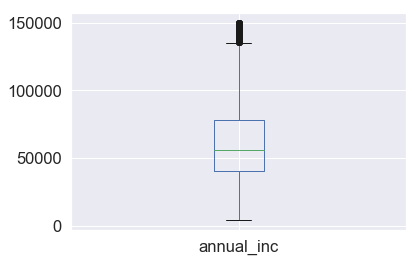

In [62]:
# created Box plot to see the spread of data
loan[loan["annual_inc"]<150000].annual_inc.plot.box()

In [63]:
# created a function for plotting the Box - subplots since it was going to be used numerously
def box3(col,df,df1,df2):
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout()

    plt.subplot(1,3,1)
    sns.boxplot(y=col,data=df)
    plt.yscale('log')

    plt.subplot(1,3,2)
    sns.boxplot(y=col,data=df1)

    plt.subplot(1,3,3)
    sns.boxplot(y=col,data=df2)
    plt.yscale('log')

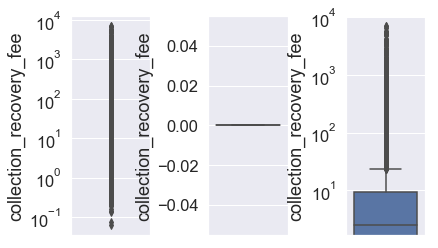

In [64]:
# created Box plot to see the spread of data
box3('collection_recovery_fee',loan,fully_paid,charged_off)

In [65]:
# checked the count of null rows 
fully_paid['collection_recovery_fee'].describe().apply(lambda x: format(x, 'f'))

count    32950.000000
mean         0.000000
std          0.000000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: collection_recovery_fee, dtype: object

In [66]:
# dropped the columns from all the dataframes since it had many nulls
loan=loan.drop('collection_recovery_fee',axis=1)
fully_paid=fully_paid.drop('collection_recovery_fee',axis=1)
charged_off=charged_off.drop('collection_recovery_fee',axis=1)

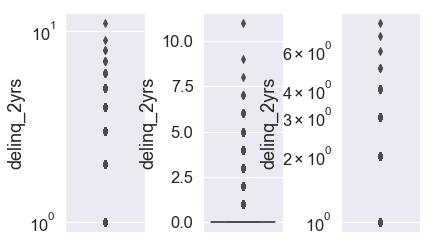

In [67]:
# created Box plot to see the spread of data
box3('delinq_2yrs',loan,fully_paid,charged_off)

In [68]:
# dropped the columns from all the dataframes since it had many nulls
loan=loan.drop('delinq_2yrs',axis=1)
fully_paid=fully_paid.drop('delinq_2yrs',axis=1)
charged_off=charged_off.drop('delinq_2yrs',axis=1)

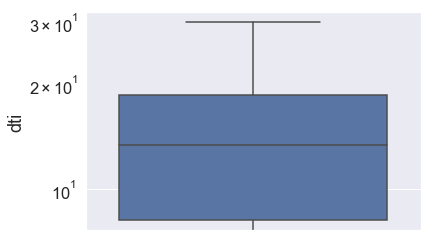

<Figure size 864x576 with 0 Axes>

In [69]:
# created Box plot to see the spread of data
box(loan,'dti')

In [70]:
# checked the count of null rows 
loan['dti'].describe()

count    38504.000000
mean        13.275347
std          6.671730
min          0.000000
25%          8.140000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

# Bi-variate Analysis

In [71]:
# created a function for plotting the bar plots since it was going to be used numerously
def bivariate(col,col1,df):
    sns.countplot(x=col,hue=col1,data=df)
    plt.xticks(rotation=90)

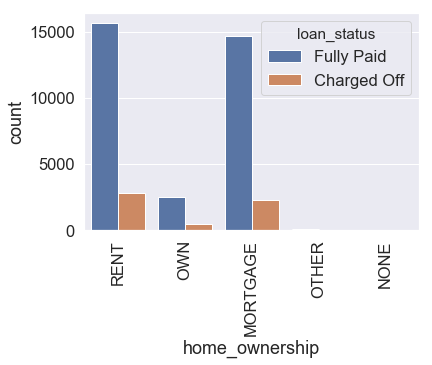

In [72]:
# checked the frequency of occurence on loan status Vs Home ownership
bivariate('home_ownership','loan_status',loan)

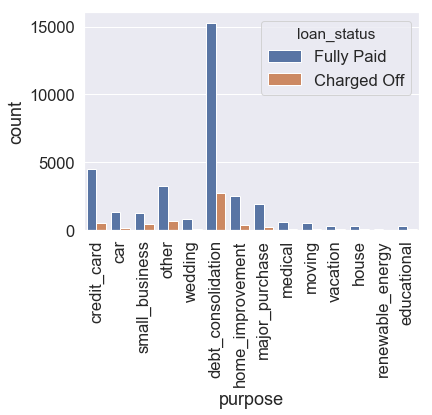

In [73]:
# checked the frequency of occurence on loan status Vs loan purpose
bivariate('purpose','loan_status',loan)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

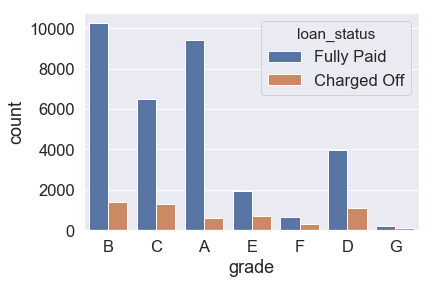

In [74]:
# checked the frequency of occurence on loan status Vs grade
bivariate('grade','loan_status',loan)
plt.xticks(rotation=0)

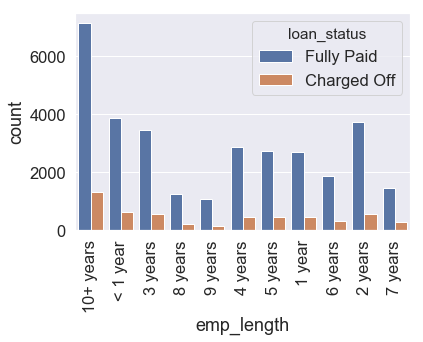

In [75]:
# checked the frequency of occurence on loan status Vs employee length on job
bivariate('emp_length','loan_status',loan)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

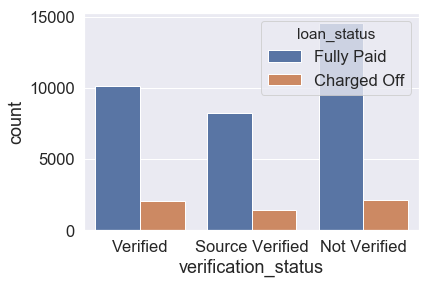

In [76]:
# checked the frequency of occurence on loan status Vs verification status
bivariate('verification_status','loan_status',loan)
plt.xticks(rotation=0)

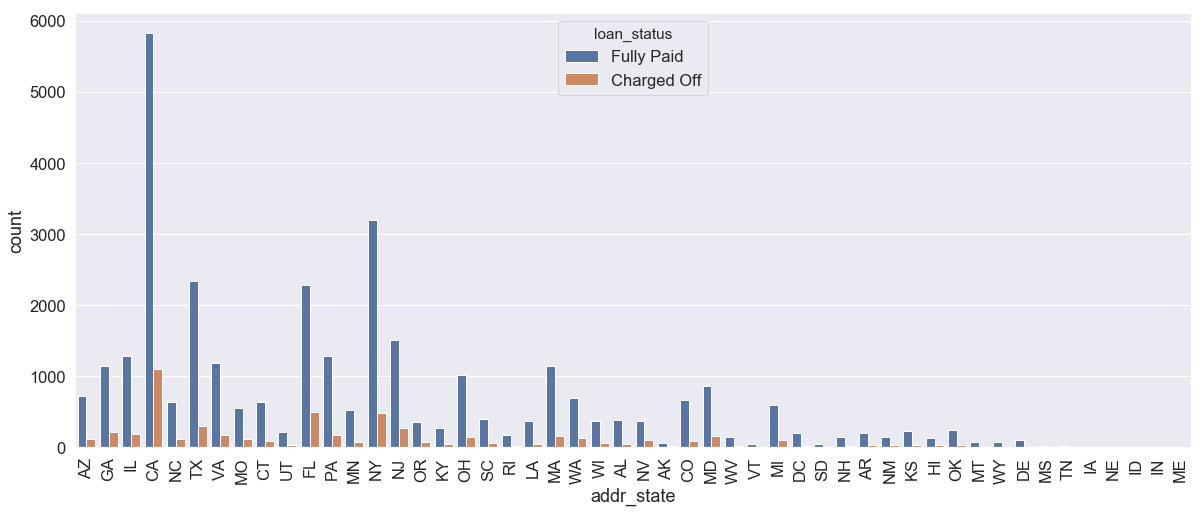

In [77]:
# checked the frequency of occurence on loan status Vs state
plt.figure(figsize=(20,8))
bivariate('addr_state','loan_status',loan)

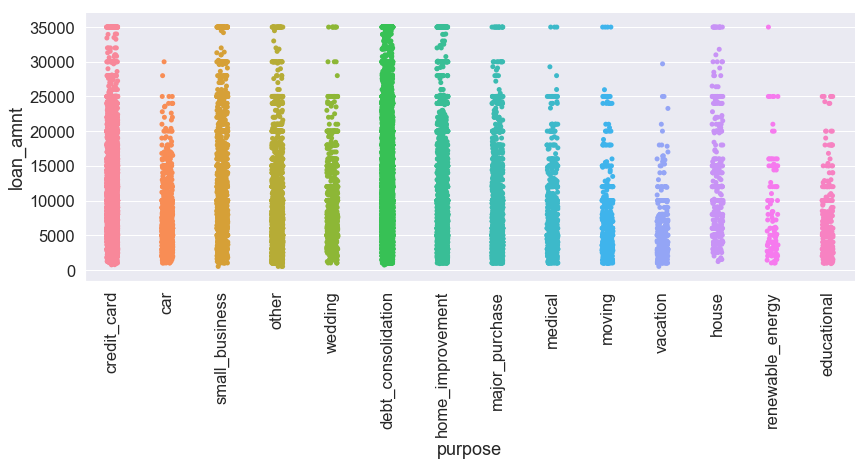

In [78]:
# checked the frequency of occurence on loan amount Vs purpose
sns.catplot(x='purpose',y='loan_amnt',data=loan,height=5,aspect=2.5)
plt.setp(plt.xticks(rotation=90))